# SMS SPAM CLASSIFICATION 

# Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading and Exploring the Dataset


In [2]:
data = pd.read_csv("C:\\Users\\suraj doifode\\Desktop\\SMSSpamCollection", sep = '\t', names=["label", "message"])

In [73]:
print(data.head())

   label                                            message  word_count  \
0      0  Go until jurong point, crazy.. Available only ...          20   
1      0                      Ok lar... Joking wif u oni...           6   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...          28   
3      0  U dun say so early hor... U c already then say...          11   
4      0  Nah I don't think he goes to usf, he lives aro...          13   

   contains_currency_symbols  contains_number  
0                          0                0  
1                          0                0  
2                          0                1  
3                          0                0  
4                          0                0  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Label Encoding

In [6]:
data["label"]=data["label"].map({'ham':0,'spam':1})

In [7]:
data

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Visualizing Imbalanced Dataset (Spam vs. Ham) 

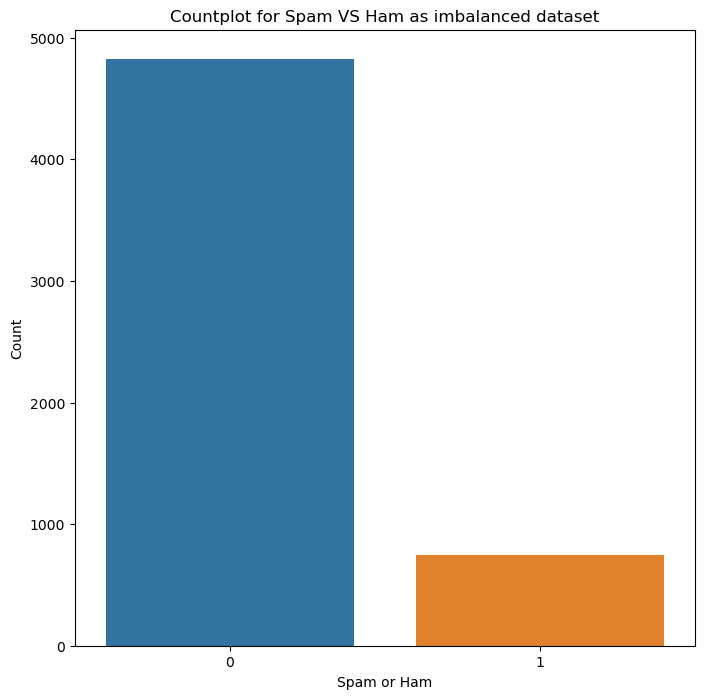

In [8]:
# Count plot for Spam VS Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="label",data = data)
p = plt.title("Countplot for Spam VS Ham as imbalanced dataset")
p = plt.xlabel("Spam or Ham")
p = plt.ylabel("Count")


# Handling Imbalanced Dataset Using Oversampling


In [9]:
# Handling imbalnced dataset using oversampling
only_spam = data[data["label"]==1]

In [10]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [11]:
print("No of Spam SMS:",len(only_spam))
print("No of Ham SMS:",len(data)-len(only_spam))

No of Spam SMS: 747
No of Ham SMS: 4825


In [12]:
count = int((data.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [13]:
count

6

In [14]:
for i in range(2, count-1):
    data = pd.concat([data, only_spam])
data.shape

(7813, 2)

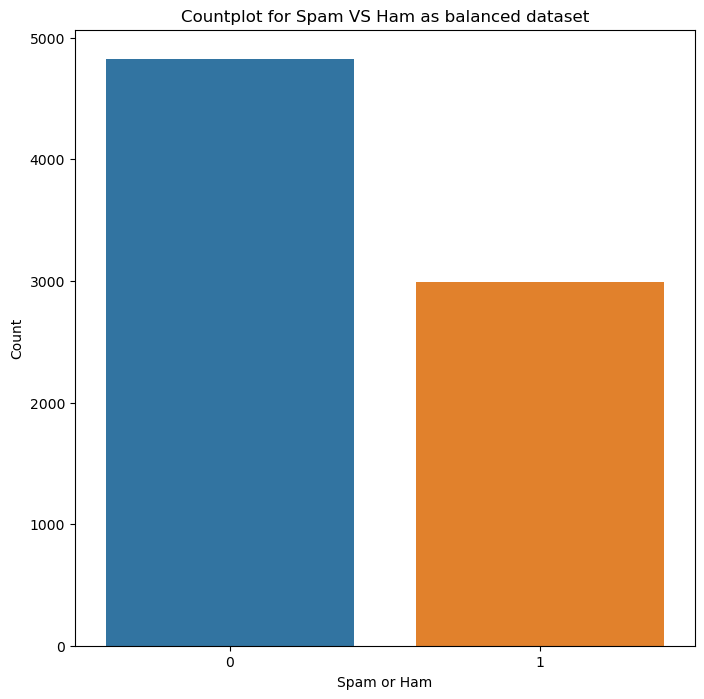

In [15]:
# Count plot for Spam VS Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="label",data = data)
p = plt.title("Countplot for Spam VS Ham as balanced dataset")
p = plt.xlabel("Spam or Ham")
p = plt.ylabel("Count")


# Feature Engineering

In [16]:
# creating new feature word_count
data["word_count"]= data["message"].apply(lambda x:len(x.split()))

In [17]:
data

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


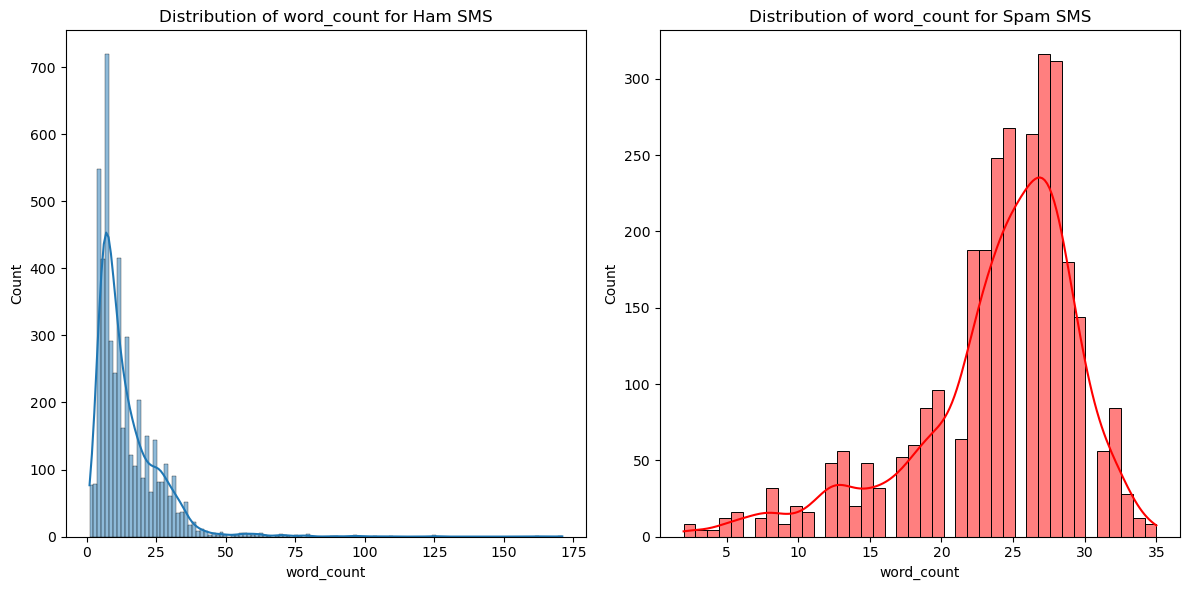

In [18]:
plt.figure(figsize=(12,6))

#(1,1)
plt.subplot(1,2,1)
g = sns.histplot(data[data["label"]==0].word_count, kde = True)
p = plt.title("Distribution of word_count for Ham SMS")

# (1,2)
plt.subplot(1,2,2)
g = sns.histplot(data[data["label"]==1].word_count, color = "red", kde = True)
p = plt.title("Distribution of word_count for Spam SMS")
plt.tight_layout()
plt.show()

In [19]:
# creating a new feature of containing currency symbols 
def currency_present(data):
    currency_symbols = ['$','£','¥','₹','€']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [20]:
data["contains_currency_symbols"]= data["message"].apply(currency_present)

In [21]:
data

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


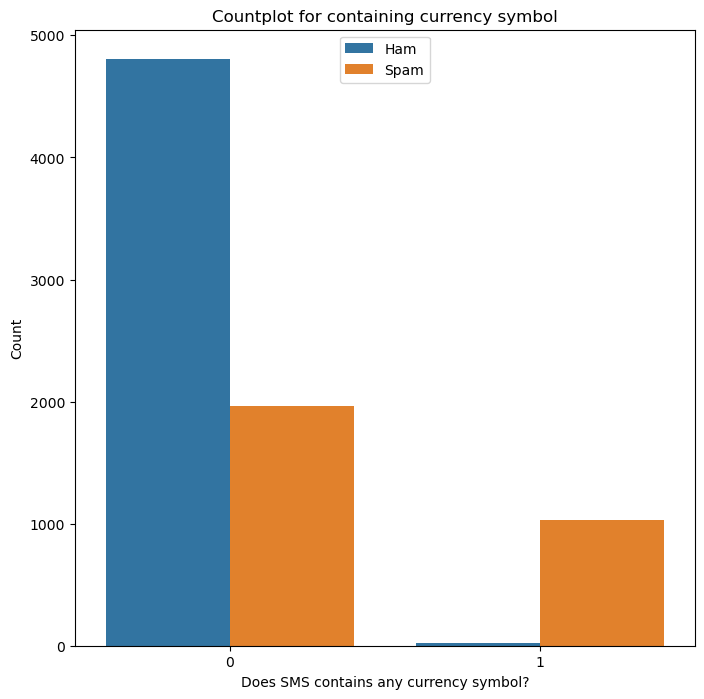

In [22]:
# Countplot for contains_currenc_symbols
plt.figure(figsize=(8,8))
g =sns.countplot(x = "contains_currency_symbols", data=data, hue = "label")
p = plt.title('Countplot for containing currency symbol')
p = plt.xlabel("Does SMS contains any currency symbol?")
p = plt.ylabel("Count")
p = plt.legend(labels = ["Ham","Spam"],loc=9) 

In [23]:
# creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [24]:
data["contains_number"] = data["message"].apply(number)

In [25]:
data

,label,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


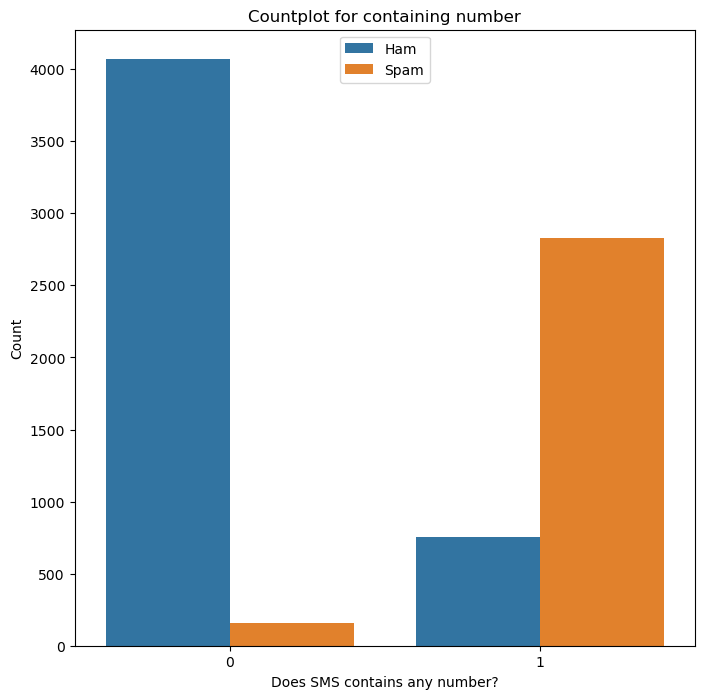

In [26]:
# Count plot for containing numbers 
plt.figure(figsize=(8,8))
g =sns.countplot(x = "contains_number", data=data, hue = "label")
p = plt.title('Countplot for containing number')
p = plt.xlabel("Does SMS contains any number?")
p = plt.ylabel("Count")
p = plt.legend(labels = ["Ham","Spam"],loc=9)

# Data Cleaning and Preprocessing

In [30]:
#Data Cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\suraj
[nltk_data]     doifode\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\suraj
[nltk_data]     doifode\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [33]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(data.message):
    # Cleaning special characters and numbers
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)
    message = message.lower()
    message = message.split()

    # Filtering out stopwords
    filtered_words = [word for word in message if word not in set(stopwords.words('english'))]

    # Lemmatization
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

    # Joining the words back into a string
    message = " ".join(lemmatized_words)
    
    # Appending to the corpus
    corpus.append(message)


In [34]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

# TF-IDF Vectorization

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# Create a TfidfVectorizer object with a max of 500 features
tfidf = TfidfVectorizer(max_features=500)

# Transform the corpus into a TF-IDF feature matrix
vectors = tfidf.fit_transform(corpus).toarray()

# Get the feature names
feature_names = tfidf.get_feature_names_out()


In [38]:
X = pd.DataFrame(vectors, columns = feature_names)
y = data['label']

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=(0.3), random_state =42)

In [45]:
X_train

,ac,account,actually,address,admirer,age,ah,aight,already,also,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
4338,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7550,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3470,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3947,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5817,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building and Evaluation

In [51]:
# Naive Bayes Model 
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring = 'f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.939
0.01


In [52]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1461
           1       0.93      0.93      0.93       883

    accuracy                           0.95      2344
   macro avg       0.95      0.95      0.95      2344
weighted avg       0.95      0.95      0.95      2344



# Confusion Matrix Visualization

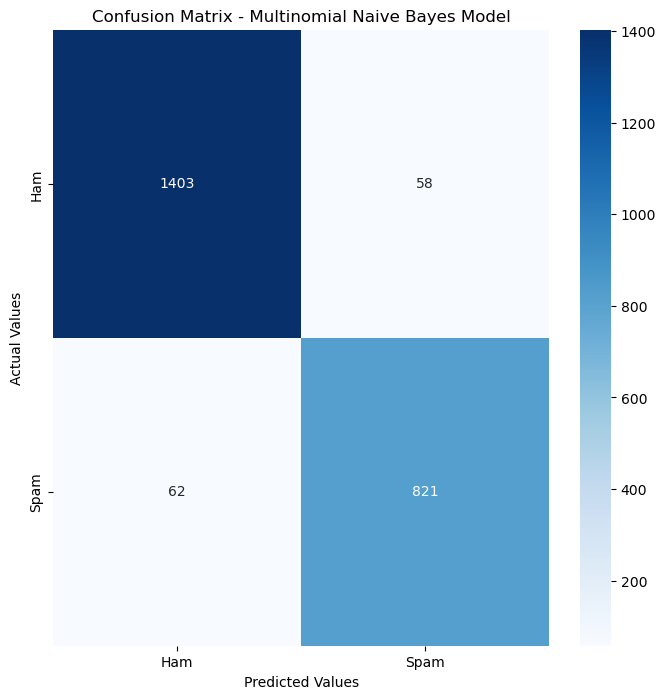

In [59]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure with a specified size
plt.figure(figsize=(8,8))

# Define axis labels
axis_labels = ["Ham", "Spam"]

# Plot the heatmap with additional annotations
g = sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)

# Add title and axis labels
plt.title("Confusion Matrix - Multinomial Naive Bayes Model")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

# Show the plot
plt.show()

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring = 'f1', cv= 10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.973
0.005


In [63]:
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1461
           1       0.93      0.93      0.93       883

    accuracy                           0.95      2344
   macro avg       0.95      0.95      0.95      2344
weighted avg       0.95      0.95      0.95      2344



In [64]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[1409,   52],
       [   4,  879]], dtype=int64)

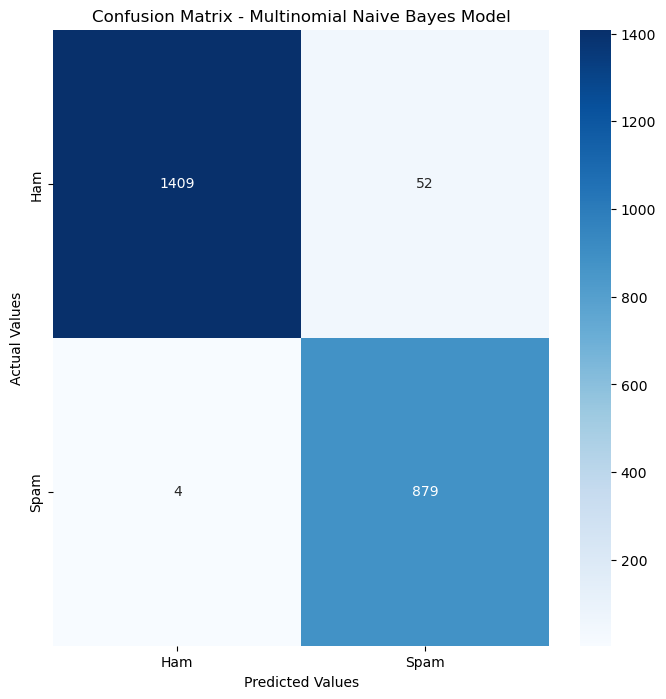

In [65]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# Create a figure with a specified size
plt.figure(figsize=(8,8))

# Define axis labels
axis_labels = ["Ham", "Spam"]

# Plot the heatmap with additional annotations
g = sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)

# Add title and axis labels
plt.title("Confusion Matrix - Multinomial Naive Bayes Model")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

# Show the plot
plt.show()

# Custom Function for Predicting Spam Messages

In [68]:
 def predict_spam(sms):
    # Cleaning special characters and numbers
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)
    message = message.lower()
    message = message.split()

    # Filtering out stopwords
    filtered_words = [word for word in message if word not in set(stopwords.words('english'))]

    # Lemmatization
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

    # Joining the words back into a string
    message = " ".join(lemmatized_words)
    temp =tfidf.transform([message]).toarray()
    return dt.predict(temp)
  


# Sample Prediction

In [74]:
sample_message = "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

if predict_spam(sample_message):
    print("This is a SPAM message.")
else:
    print("This is a HAM(normal) message.")

This is a SPAM message.


C:\Users\suraj doifode\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
